<a href="https://colab.research.google.com/github/saqlineniam/100-Days-ML/blob/main/47.%20PCA%2C_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [23]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

digit_recognizer_path = kagglehub.competition_download('digit-recognizer')

print('Data source import complete.')


Data source import complete.


In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [32]:
df = pd.read_csv(r'/content/sample_data/mnist_train_small.csv')

In [33]:
df.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
df.shape

(19999, 785)

In [16]:
import matplotlib.pyplot as plt

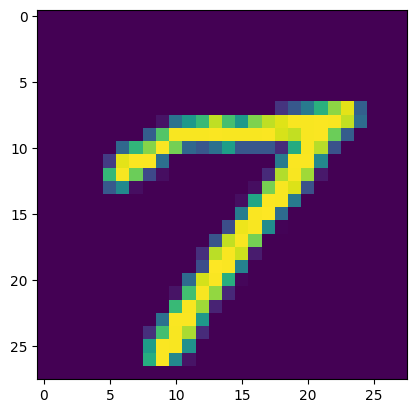

In [36]:
plt.imshow(df.iloc[1999,1:].values.reshape(28,28))

In [37]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [38]:
y

,6
0,5
1,7
2,9
3,5
4,2
...,...
19994,0
19995,1
19996,2
19997,9


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .2, random_state = 42)

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
knn = KNeighborsClassifier()

In [43]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [44]:
y_pred = knn.predict(x_test)

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.95525

In [46]:
from sklearn.decomposition import PCA

In [47]:
pca = PCA(n_components = 100)

In [48]:
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [49]:
x_train_trf.shape

(15999, 100)

In [50]:
knn = KNeighborsClassifier()

In [51]:
knn.fit(x_train_trf, y_train)

KNeighborsClassifier()

In [52]:
y_train_trf_pred = knn.predict(x_test_trf)

In [53]:
accuracy_score(y_train_trf_pred,y_test)

0.9625

In [54]:
for i in range (1,785):
    pca = PCA(n_components = i)
    x_train_trf = pca.fit_transform(x_train)
    x_test_trf = pca.transform(x_test)
    knn = KNeighborsClassifier()
    knn.fit(x_train_trf, y_train)
    y_train_trf_pred = knn.predict(x_test_trf)
    print(accuracy_score(y_train_trf_pred,y_test))

0.25275
0.4025
0.47
0.6255
0.72825
0.819
0.854
0.8845
0.90625
0.91575
0.9205
0.93225
0.9405
0.945
0.945
0.9475
0.9485
0.9525
0.9555
0.958
0.959
0.96175
0.96075
0.96125
0.962
0.961
0.9615
0.9625
0.96425
0.96525
0.965
0.96625
0.966
0.965
0.9635
0.964
0.9645
0.96525
0.965
0.9645
0.964
0.9655
0.96425
0.96525
0.9645
0.966
0.96625
0.967
0.96575
0.96675
0.966
0.9665
0.96725
0.96725
0.967
0.96575
0.96475
0.96575
0.9655
0.96575
0.9665
0.967
0.96675
0.9665
0.9675
0.9665
0.966
0.96575
0.96525
0.9645
0.965
0.96525
0.96525
0.965
0.96375
0.964
0.9635
0.96325
0.9635
0.964
0.964
0.964
0.96375
0.963
0.96325
0.964
0.96425
0.96425
0.96425
0.96375
0.9635
0.96325
0.9635
0.9635
0.96375
0.96325
0.96325
0.96275
0.96225
0.9625
0.962
0.96275
0.9625
0.96225
0.962
0.9615
0.962
0.96175
0.9615
0.96225
0.962
0.962
0.962
0.96175
0.9615
0.96125
0.96175
0.9615
0.9615
0.96175
0.962
0.9625
0.962
0.96175
0.96125
0.96075
0.96025
0.961
0.96075
0.9605
0.96175
0.962
0.96175
0.9615
0.9615
0.96125
0.9605
0.9605
0.96075
0.96025


KeyboardInterrupt: 

In [55]:
pca = PCA(n_components = 2)

In [56]:
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [59]:
import plotly.express as px

y_train_trf = y_train.astype(str)

fig = px.scatter(x = x_train_trf[:,0],
                 y = x_train_trf[:,1],
                 color = y_train_trf,
                 color_discrete_sequence = px.colors.qualitative.G10
                )
fig.show()